In [ ]:
species_name = "Equus_ferus"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_7175/3768620021.py:3: RuntimeWarning: invalid value encountered in log
  l3 = np.log(839.912 - 849)/800


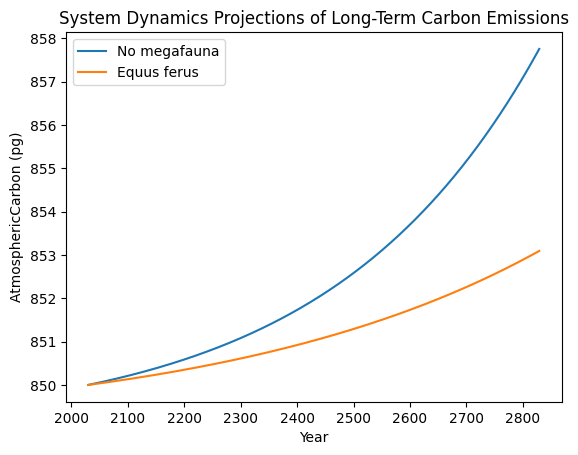

In [20]:
l1 = np.log(857.778 - 849)/800
l2 = np.log(853.099 - 849)/800
l3 = np.log(839.912 - 849)/800
x = np.arange(2030, 2830, 1)
y1 = 849 + np.exp(l1 * (x - 2030))
y2 = 849 + np.exp(l2 * (x - 2030))
y3 = 849 + np.exp(l3 * (x - 2030))
plt.plot(x, y1, label="No megafauna")
plt.plot(x, y2, label=species_name)
plt.xlabel("Year")
plt.ylabel("AtmosphericCarbon (pg)")
plt.title("System Dynamics Projections of Long-Term Carbon Emissions")
plt.legend()

In [2]:
df = pd.read_csv('MaxentResults/' + species_name + '/' + species_name + '_backgroundPredictions.csv')
print(df.head())

           x          y           raw  cumulative   Cloglog
0 -39.000000  83.666667  8.253190e-08    0.205539  0.037378
1 -38.833333  83.666667  8.253190e-08    0.205539  0.037378
2 -38.666667  83.666667  8.915620e-08    0.231585  0.040316
3 -38.500000  83.666667  1.246080e-07    0.380087  0.055892
4 -38.333333  83.666667  1.958990e-07    0.741379  0.086453


/tmp/ipykernel_96008/771195040.py:2: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap=df['Cloglog'], mappable = matplotlib.cm.ScalarMappable())


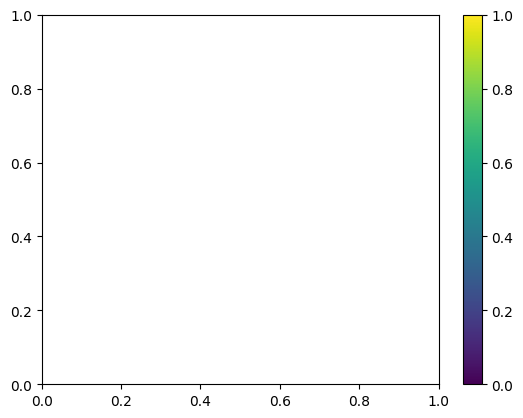

In [3]:
import matplotlib
plt.colorbar(cmap=df['Cloglog'], mappable = matplotlib.cm.ScalarMappable())

/tmp/ipykernel_96008/2129449515.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(cmap=df['Cloglog'], mappable = matplotlib.cm.ScalarMappable())


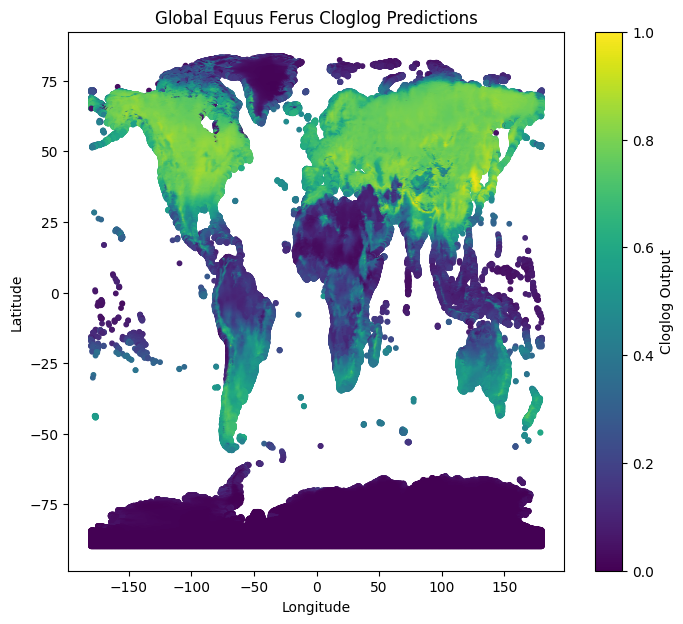

In [4]:
x = df['x']
y = df['y']

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(x, y, zorder=1, alpha= 1, c=df['Cloglog'], s=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_title('Global ' + species_name + ' Cloglog Predictions')
cb = plt.colorbar(cmap=df['Cloglog'], mappable = matplotlib.cm.ScalarMappable())
cb.set_label('Cloglog Output')
#ax.set_xlim([158, 162])
#ax.set_ylim([68, 69])

# park = plt.imread('park_region.png')
# ax.imshow(park, zorder=0, extent=(158, 162, 68, 69), aspect="auto")

In [5]:
print((df['x'] >= bounds[0]) & (df['x'] <= bounds[1]))

NameError: name 'bounds' is not defined

Text(0.5, 1.0, 'Equus Ferus Occurrence Probabilities in Park')

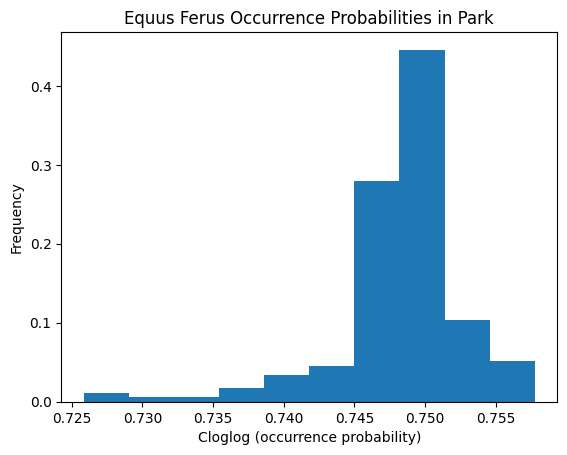

In [14]:
#compute only points in bounding box
bounds = [158, 162, 68, 69]
new_df = df[(df['x'] >= bounds[0]) & (df['x'] <= bounds[1]) & (df['y'] >= bounds[2]) & (df['y'] <= bounds[3])]
plt.hist(new_df['Cloglog'], weights=np.ones_like(new_df['Cloglog']) / len(new_df['Cloglog']))
plt.xlabel('Cloglog (occurrence probability)')
plt.ylabel('Frequency')
plt.title(species_name + ' Occurrence Probabilities in Park')

Text(0.5, 1.0, 'Equus Ferus Occurrence Probabilities Globally')

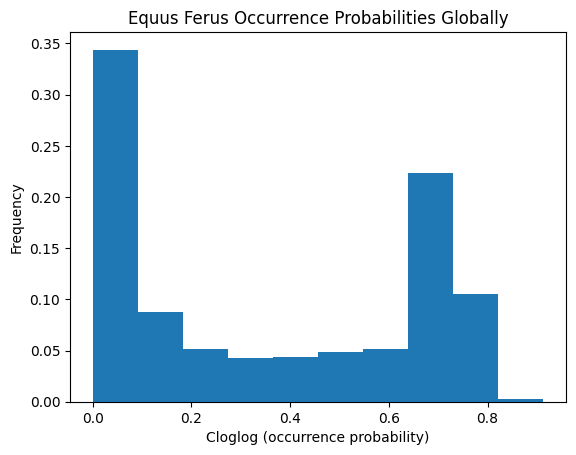

In [12]:
plt.hist(df['Cloglog'], weights=np.ones_like(df['Cloglog']) / len(df['Cloglog']))
plt.xlabel('Cloglog (occurrence probability)')
plt.ylabel('Frequency')
plt.title(species_name + ' Occurrence Probabilities Globally')

In [42]:
#number of animals: sum((cloglog/0.63) * (density of animals) * (area of clim)) = density * sum(cloglog of cell/0.63 * area of cell)
# = density * area of cell * sum(cloglog of region/0.63)
density_df = pd.read_csv('densities.csv')
print(density_df.columns)
park_area = 17816.53 #sq-km
num_cells = len(new_df)
print(num_cells)
cell_area = park_area / num_cells
species_density = density_df[density_df['Binomial.1.2'] == species_name]['density.mean'] #individuals/sq-km
print(species_density)
print(new_df['Cloglog']/0.63)
park_pop = (new_df['Cloglog']/0.63).sum() * species_density * cell_area #individuals

print("Total sustainable " + species_name + " population:", park_pop)

Index(['Binomial.1.2', 'Order.1.2', 'Family.1.2', 'log10BM',
       'log10.density.median', 'log10.density.mean', 'sd', 'log10.lower.95hpd',
       'log10.upper.95hpd', 'density.median', 'density.mean', 'lower.95hpd',
       'upper.95hpd'],
      dtype='object')
175
1358    2.149047
Name: density.mean, dtype: float64
61809    0.877261
61810    0.876392
61811    0.879865
61812    0.892762
61813    0.898792
           ...   
71524    0.955260
71525    0.955690
71526    0.946000
71527    0.942761
71528    0.944741
Name: Cloglog, Length: 175, dtype: float64
Total sustainable Equus Ferus population: 1358    35664.886364
Name: density.mean, dtype: float64


In [47]:
traits = pd.read_csv('PHYLACINE_1.2/Data/Traits/Trait_data.csv')
kg_per_animal = (traits[traits['Binomial.1.2'] == species_name]['Mass.g'])/1000
park_mass = park_pop.iloc[0] * kg_per_animal.iloc[0]
print("Total sustainable " + species_name + " mass:", park_mass)

200.0
